In [1]:
from scipy.stats import chisquare
from scipy import stats
import urllib.request
import string
import requests
from bs4 import BeautifulSoup
import pandas as pd
import multiprocessing
import gensim
import sys
import spacy
nlp=spacy.load('en')
import seaborn as sns
from nltk.tokenize import WordPunctTokenizer
tknzr = WordPunctTokenizer()
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from scipy import spatial
from collections import Counter
import numpy as np
from collections import defaultdict
from pprint import pprint
from gensim import corpora
import re
import logging
import requests
import urllib 
import re
import sys
import zipfile
from glob import glob
import statsmodels.api as sm
import scipy
import scipy.stats as ss
from scipy.signal import savgol_filter
import random
# np.set_printoptions(precision=4)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import metrics
from sklearn.cluster import KMeans
# from the demo
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.corpus import names
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
# Load your usual SpaCy model (one of SpaCy English models)
import spacy
nlp = spacy.load('en')

# load NeuralCoref and add it to the pipe of SpaCy's model
import neuralcoref
coref = neuralcoref.NeuralCoref(nlp.vocab)
nlp.add_pipe(coref, name='neuralcoref')

2019-06-14 10:58:33,160 : INFO : Loading model from /Users/xuhuimin/.neuralcoref_cache/neuralcoref


In [3]:
import spacy
from spacy.symbols import nsubj, nsubjpass, csubj, csubjpass, agent, expl, VERB
nlp1 = spacy.load("en_core_web_sm")

In [4]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()
    
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

def cultureD2(model, words):
    cultures = []
    for word in words:
        if (word[0] in model.wv.vocab) & (word[1] in model.wv.vocab):
            cultures.append(normalize(normalize(model[word[0]]) - normalize(model[word[1]])))
        else:
            print(word)
    culturev = normalize(np.mean(cultures, axis=0))
    return culturev

def storyv(model,words):
    veclist=[]
    for w in words:
        if w in model.wv.vocab:
            veclist.append(normalize(model[w]))
    storyv=normalize(np.mean(veclist,axis=0))
    return storyv

def projection(storyv, culturev):
    # cosine similarity
    return (1 - spatial.distance.cosine(storyv, culturev))
           
def cosine2angle(i):
    return np.arccos(i) / np.pi * 180 #长度换角度

def normalized(x):
    x= np.array(x)
    return (x-np.mean(x))/np.std(x)

def normalization(x):
    x=np.array(x)
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [5]:
swords = [
    ['success','failure'],
    ['succeed','fail'],
    ['lucky', 'unlucky'],
    ['fortunate', 'unfortunate'],
    ['happy', 'unhappy'],
    ['glad', 'sad'],
    ['joy', 'sorrow'],
    ['smile', 'tear']
] # success words

In [7]:
# Load Google's pre-trained Word2Vec model.
# model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

In [8]:
# success_vector = cultureD2(model, swords)
# success_word = [i[0] for i in model.similar_by_vector(success_vector, 1)]

In [6]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()

In [7]:
def main_character(lead):
    lead=[i.title() for i in lead]
    film_name_list = (set(lead) & set(male_names)) |\
                    (set(lead) & set(female_names))
    film_script_wordlist_counter = Counter(lead)
    df = pd.DataFrame([[i, film_script_wordlist_counter[i]] for i in film_name_list]\
                                      , columns=['name', 'count'])
    df['gender']=df['name'].apply(lambda x:'male' if x in male_names else 'female')
    df=df.sort_values(by='count', ascending=False)
    lead = df['name'].values[0]
    lead_gender=df['gender'].values[0]
    if lead_gender=='female':
        lead1=df[df['gender']=='male']['name'].values[0]
    else:
        lead1=df[df['gender']=='female']['name'].values[0]
    return lead,lead_gender,lead1

In [8]:
# 获取名字，性别数据列表
male_names = [name for name in names.words('male.txt')]
female_names = [name for name in names.words('female.txt')]
names=male_names+female_names

In [11]:
# data=pd.read_csv('./gender.txt',sep=',',names=['name','gender'])
# data=data.dropna(axis=0,how='any')
# data['name']=data['name'].apply(lambda x:x.title() if type(x)==str else print(x))
# male_names=data[data['gender']=='male']['name'].values
# female_names=data[data['gender']=='female']['name'].values
# all_names=data['name'].values

In [9]:
with open('./stopword.txt','r') as f:
    stopword=f.readlines()
stopword=[i.split('\n')[0] for i in stopword]

In [12]:
def get_maintext_lines_gutenberg(raw_text):
    lines = raw_text.split("\n")
    start_book_i = 0
    end_book_i = len(lines)-1
    # pass 1, this format is easy and gets 78.9% of books
    start1="START OF THIS PROJECT GUTENBERG EBOOK"
    start2="START OF THE PROJECT GUTENBERG EBOOK"
    end1="END OF THIS PROJECT GUTENBERG EBOOK"
    end2="END OF THE PROJECT GUTENBERG EBOOK"
    end3="END OF PROJECT GUTENBERG"
    for j,line in enumerate(lines):
        if (start1 in line) or (start2 in line):
            # and "***" in line and start_book[i] == 0 and j<.25*len(lines):
            start_book_i = j
        end_in_line = end1 in line or end2 in line or end3 in line.upper()
        if end_in_line and (end_book_i == (len(lines)-1)):
            #  and "***" in line and j>.75*len(lines)
            end_book_i = j
    # pass 2, this will bring us to 99%
    if (start_book_i == 0) and (end_book_i == len(lines)-1):
        for j,line in enumerate(lines):
            if ("end" in line.lower() or "****" in line) and  "small print" in line.lower() and j<.5*len(lines):
                start_book_i = j
            if "end" in line.lower() and "project gutenberg" in line.lower() and j>.75*len(lines):
                end_book_i = j
        # pass three, caught them all (check)
        if end_book_i == len(lines)-1:
            for j,line in enumerate(lines):
                if "THE END" in line and j>.9*len(lines):
                    end_book_i = j
    return lines[(start_book_i+1):(end_book_i)]

In [13]:
def chunkify(lines):
    # put them back together...
    raw_text = "\n".join(lines)
    # remove extra whitespace
    raw_text_1 = re.sub("\n[\\s]+?\n","\n\n",raw_text)
    # remove singleton newlines
    raw_text_2 = re.sub(r"([^\n])\n([^\n])",r"\1 \2",raw_text_1)
    raw_text_3 = raw_text_2.rstrip().lstrip()

    # three levels of significance
    # single newlines were already discarded (insignificant)
    # double newlines are real line breaks
    # triple newlines (or more) separate content

    # split on those triples (or more)
    big_chunks = re.split("\n\n\n+",raw_text_3)

    # now break them into the paragraphs
    small_chunks = list(map(lambda x: re.split("\n\n",x),big_chunks))
    combined_chunks = []
    [combined_chunks.extend(el) for el in small_chunks]
#     combined_chunks = []

#     for i in range(len(small_chunks)):
#         for j in range(len(small_chunks[i])):
#             combined_chunks.append((i,j,small_chunks[i][j]))
    return combined_chunks
#     return small_chunks

In [14]:
book=pd.read_csv('./book.csv')

In [15]:
def eval_(x):
    try:
        return eval(x)
    except:
        return np.nan
        pass

book['character']=book['character'].apply(lambda x: eval_(x))
book['emotion']=book['emotion'].apply(lambda x: eval_(x))

In [16]:
book=book.dropna(axis=0,how='any',subset=['tp','character','emotion'])

In [18]:
# book['character']=book['character'].apply(lambda x: [x[0],x[2],x[1]] if x[1]=='male' else [x[2],x[0],x[1]])

In [17]:
all_pos=[]
gap=5
for i,n in enumerate(book['no'].values):
    try:
        flushPrint(i)
        f = open('./gutenberg/'+str(n)+'.txt',"r",encoding='ISO-8859-1')
        rawtext = f.read()
        f.close()
        lines = get_maintext_lines_gutenberg(rawtext)
        chunked = chunkify(lines)

        male=book[book['no']==n]['character'].values[0][0]
        female=book[book['no']==n]['character'].values[0][1]

        d=pd.DataFrame()
        d['sentence']=chunked
        d['index']=d.index
        d['include']=d['sentence'].apply(lambda x: 'no' if ([i.lower() for i in tknzr.tokenize(x)][-1][-1] \
                        not in string.punctuation) & (len([i.lower() for i in tknzr.tokenize(x)])<6) else 'yes')
        d=d[d['include']=='yes']
        d=d.reset_index(drop=False)

        d['f']=d['sentence'].apply(lambda x: 'yes' if female.lower() in [i.lower() for i in tknzr.tokenize(x)] else 'no')
        d['m']=d['sentence'].apply(lambda x: 'yes' if male.lower() in [i.lower() for i in tknzr.tokenize(x)] else 'no')
        d['a']=d['sentence'].apply(lambda x: 'yes' if (male.lower() in [i.lower() for i in tknzr.tokenize(x)]) or (female.lower() in [i.lower() for i in tknzr.tokenize(x)]) else 'no')

        tp_f=d[d['f']=='yes'].index.values
        tp_m=d[d['m']=='yes'].index.values

        female_all=[]
        for t in tp_f:
            value=[j for j in tknzr.tokenize(d['sentence'].values[t])]
            value=nlp(' '.join(value))._.coref_resolved
            doc = nlp1(value)
            doc=[i.string.split(' ')[0] for i in doc]
            i=[j for j in doc if (len(j)>1) & (j not in string.punctuation)]
            indices = (j for j,word in enumerate(i) if word.lower()==female.lower())
            neighbors = []
            for ind in indices:
                if ind<gap:
                    a=i[0:ind]+i[ind+1:ind+1+gap]
                    neighbors.append([j.lower() for j in a if (j not in names) &(j.lower() not in stopword)])
                else:
                    neighbors.append([j.lower() for j in i[ind-gap:ind]+i[ind+1:ind+1+gap] if (j not in names) &(j.lower() not in stopword)])
            female_all.append(neighbors)

        male_all=[]
        for t in tp_m:
            value=[j for j in tknzr.tokenize(d['sentence'].values[t])]
            value=nlp(' '.join(value))._.coref_resolved
            doc = nlp1(value)
            doc=[i.string.split(' ')[0] for i in doc]
            i=[j for j in doc if (len(j)>1) & (j not in string.punctuation)]
            indices = (j for j,word in enumerate(i) if word.lower()==male.lower())
            neighbors = []
            for ind in indices:
                if ind<gap:
                    a=i[0:ind]+i[ind+1:ind+1+gap]
                    neighbors.append([j.lower() for j in a if (j not in names) &(j.lower() not in stopword)])
                else:
                    neighbors.append([j.lower() for j in i[ind-gap:ind]+i[ind+1:ind+1+gap] if (j not in names) &(j.lower() not in stopword)])
            male_all.append(neighbors)
        all_pos.append([n,female_all,male_all,tp_f,tp_m])
    except Exception as e:
        print(e)
        pass

2

KeyboardInterrupt: 

In [19]:
file=[i[0] for i in all_pos]
female_all=[i[1] for i in all_pos]
male_all=[i[2] for i in all_pos]
tp_f=[i[3] for i in all_pos]
tp_m=[i[4] for i in all_pos]

diction1=dict(zip(file,female_all))
diction2=dict(zip(file,male_all))
diction3=dict(zip(file,tp_f))
diction4=dict(zip(file,tp_m))


book['female_all']=book['no'].apply(lambda x: diction1[x] if x in diction1 else np.nan)
book['male_all']=book['no'].apply(lambda x: diction2[x] if x in diction2 else np.nan)
book['tp_f']=book['no'].apply(lambda x: diction3[x] if x in diction3 else np.nan)
book['tp_m']=book['no'].apply(lambda x: diction4[x] if x in diction4 else np.nan)

In [ ]:
book.to_csv('./book.csv',index=False)

In [47]:
# f = open('./gutenberg/'+str(11)+'.txt',"r",encoding='ISO-8859-1')
# rawtext = f.read()
# f.close()
# lines = get_maintext_lines_gutenberg(rawtext)
# chunked = chunkify(lines)

# male=book[book['no']==11]['character'].values[0][0]
# female=book[book['no']==11]['character'].values[0][1]

# d=pd.DataFrame()
# d['sentence']=chunked
# d['index']=d.index
# d['include']=d['sentence'].apply(lambda x: 'no' if ([i.lower() for i in tknzr.tokenize(x)][-1][-1] \
#                 not in string.punctuation) & (len([i.lower() for i in tknzr.tokenize(x)])<6) else 'yes')
# d=d[d['include']=='yes']
# d=d.reset_index(drop=False)

# d['f']=d['sentence'].apply(lambda x: 'yes' if female.lower() in [i.lower() for i in tknzr.tokenize(x)] else 'no')
# d['m']=d['sentence'].apply(lambda x: 'yes' if male.lower() in [i.lower() for i in tknzr.tokenize(x)] else 'no')
# d['a']=d['sentence'].apply(lambda x: 'yes' if (male.lower() in [i.lower() for i in tknzr.tokenize(x)]) or (female.lower() in [i.lower() for i in tknzr.tokenize(x)]) else 'no')

# tp=d[d['a']=='yes'].index

# m_verbs=[]
# f_verbs=[]
# m_adjs=[]
# f_adjs=[]
# for t in tp:
#     m_verb=[]
#     f_verb=[]
#     m_adj=[]
#     f_adj=[]
#     value=[j for j in tknzr.tokenize(d['sentence'].values[t])]
#     value=nlp(' '.join(value))._.coref_resolved
#     doc = nlp1(value)
#     for token in doc:
#         if male in token.string:
#             if (token.dep == nsubj or agent)and token.head.pos == VERB:
#                 m_verb.append(token.head)
#                 a=[i for i in token.children if i.pos_== 'ADJ']
#                 b=[i for i in token.head.children if i.pos_== 'ADJ']
#                 m_adj.extend(a+b)
#         if female in token.string:
#             if (token.dep == nsubj or agent)and token.head.pos == VERB:
#                 f_verb.append(token.head)
#                 a=[i for i in token.children if i.pos_== 'ADJ']
#                 b=[i for i in token.head.children if i.pos_== 'ADJ']
#                 f_adj.extend(a+b)
#     m_verbs.append(m_verb)
#     f_verbs.append(f_verb)
#     m_adjs.append(m_adj)
#     f_adjs.append(f_adj)

In [64]:
# all_pos=[]
# for i,n in enumerate(book['no'].values):
#     try:
#         flushPrint(i)
#         f = open('./gutenberg/'+str(n)+'.txt',"r",encoding='ISO-8859-1')
#         rawtext = f.read()
#         f.close()
#         lines = get_maintext_lines_gutenberg(rawtext)
#         chunked = chunkify(lines)

#         male=book[book['no']==n]['character'].values[0][0]
#         female=book[book['no']==n]['character'].values[0][1]

#         d=pd.DataFrame()
#         d['sentence']=chunked
#         d['index']=d.index
#         d['include']=d['sentence'].apply(lambda x: 'no' if ([i.lower() for i in tknzr.tokenize(x)][-1][-1] \
#                         not in string.punctuation) & (len([i.lower() for i in tknzr.tokenize(x)])<6) else 'yes')
#         d=d[d['include']=='yes']
#         d=d.reset_index(drop=False)

#         d['f']=d['sentence'].apply(lambda x: 'yes' if female.lower() in [i.lower() for i in tknzr.tokenize(x)] else 'no')
#         d['m']=d['sentence'].apply(lambda x: 'yes' if male.lower() in [i.lower() for i in tknzr.tokenize(x)] else 'no')
#         d['a']=d['sentence'].apply(lambda x: 'yes' if (male.lower() in [i.lower() for i in tknzr.tokenize(x)]) or (female.lower() in [i.lower() for i in tknzr.tokenize(x)]) else 'no')

#         tp=d[d['a']=='yes'].index

#         m_verbs=[]
#         f_verbs=[]
#         m_adjs=[]
#         f_adjs=[]
#         for t in tp:
#             m_verb=[]
#             f_verb=[]
#             m_adj=[]
#             f_adj=[]
#             value=[j for j in tknzr.tokenize(d['sentence'].values[t])]
#             value=nlp(' '.join(value))._.coref_resolved
#             doc = nlp1(value)
#             for token in doc:
#                 if male in token.string:
#                     if (token.dep == nsubj or agent)and token.head.pos == VERB:
#                         m_verb.append(token.head)
#                         a=[i for i in token.children if i.pos_== 'ADJ']
#                         b=[i for i in token.head.children if i.pos_== 'ADJ']
#                         m_adj.extend(a+b)
#                 if female in token.string:
#                     if (token.dep == nsubj or agent)and token.head.pos == VERB:
#                         f_verb.append(token.head)
#                         a=[i for i in token.children if i.pos_== 'ADJ']
#                         b=[i for i in token.head.children if i.pos_== 'ADJ']
#                         f_adj.extend(a+b)
#             m_verbs.append(m_verb)
#             f_verbs.append(f_verb)
#             m_adjs.append(m_adj)
#             f_adjs.append(f_adj)
#         all_pos.append([n,m_verbs,f_verbs,m_adjs,f_adjs])
#     except Exception as e:
#         print(e)
#         pass  

2

KeyboardInterrupt: 

In [71]:
file=[i[0] for i in all_pos]
m_verbs=[i[1] for i in all_pos]
f_verbs=[i[2] for i in all_pos]
m_adjs=[i[3] for i in all_pos]
f_adjs=[i[4] for i in all_pos]

diction1=dict(zip(file,m_verbs))
diction2=dict(zip(file,f_verbs))
diction3=dict(zip(file,m_adjs))
diction4=dict(zip(file,f_adjs))


book['m_verbs']=book['no'].apply(lambda x: diction1[x] if x in diction1 else np.nan)
book['f_verbs']=book['no'].apply(lambda x: diction2[x] if x in diction2 else np.nan)
book['m_adjs']=book['no'].apply(lambda x: diction3[x] if x in diction3 else np.nan)
book['f_adjs']=book['no'].apply(lambda x: diction4[x] if x in diction4 else np.nan)

In [ ]:
book.to_csv('./book.csv',index=False)

In [10]:
book=pd.read_csv('./book.csv')

In [11]:
def eval_(x):
    try:
        return eval(x)
    except:
        return np.nan
        pass

In [12]:
book['tp']=book['tp'].apply(lambda x: eval_(x))
book['emotion']=book['emotion'].apply(lambda x: eval_(x))
book['character']=book['character'].apply(lambda x: eval_(x))

### acompany

In [13]:
book.columns

Index(['no', 'author', 'category', 'download_num', 'lang', 'loc_class',
       'release_date', 'subject', 'title', 'count', 'len', 'tp', 'character',
       'emotion', 'm_verbs', 'f_verbs', 'm_adjs', 'f_adjs', 'cum_e', 'tp_e',
       'tp_c', 'k', 'up', 'female_all', 'male_all', 'tp_f', 'tp_m', 'male_a',
       'female_a', 'm_cn', 'f_cn', 'm_b', 'f_b', 'm_k_1', 'f_k_1', 'm_k_2',
       'f_k_2', 'm_k_3', 'f_k_3', 'm_k_4', 'f_k_4', 'm_k_5', 'f_k_5', 'm_k_6',
       'f_k_6', 'm_k_7', 'f_k_7', 'm_k_8', 'f_k_8', 'm_k_9', 'f_k_9',
       'trend_f', 'trend_m', 'distance', 'tp_l'],
      dtype='object')

In [14]:
len(book)

927

In [15]:
book['character'].values[0]

['Gryphon', 'Alice', 'female']

In [16]:
book['lead_gender']=book['character'].apply(lambda x: x[-1])

In [17]:
book['co_n']=book['tp'].apply(lambda x: len(x))

In [18]:
book['l']=book['emotion'].apply(lambda x: len(x))

In [19]:
book['prob']=book['co_n']/book['l']

In [42]:
book1=book[book['co_n']>0]

In [43]:
len(book)

927

In [44]:
male=book1[(book1['lead_gender']=='male')]
female=book1[(book1['lead_gender']=='female')]

In [45]:
male['prob'].describe()

count    562.000000
mean       0.020949
std        0.027459
min        0.000401
25%        0.003604
50%        0.011696
75%        0.028223
max        0.235294
Name: prob, dtype: float64

In [47]:
male['prob'].sem()

0.0011583016364425096

In [46]:
female['prob'].describe()

count    365.000000
mean       0.021823
std        0.022980
min        0.000463
25%        0.004184
50%        0.014577
75%        0.031865
max        0.121462
Name: prob, dtype: float64

In [48]:
female['prob'].sem()

0.00120284776657402

In [36]:
v,p=stats.ttest_ind([i for i in male['prob'].values], [i for i in female['prob'].values])
p

0.9031186978676145

In [10]:
def extend(x):
    c=[]
    for n,i in enumerate(book[x].values):
        match = re.findall('\[.*?\]', i[1:-1])
        match =[re.findall(r'[[](.*?)[]]', j)[0].split(', ') for j in match]
        tp=book['tp'].values[n]
        a=[]
        [a.extend(q) for k,q in enumerate(match) if k in tp]
        a=[j for j in a if len(j)>0]
        c.extend(a)
    return c

In [11]:
female_adj=extend('f_adjs')
male_adj=extend('m_adjs')
female_verb=extend('f_verbs')
male_verb=extend('m_verbs')

In [24]:
len(set(female_adj))

307

In [25]:
len(set(male_adj))

311

In [26]:
len(set(female_verb))

1468

In [27]:
len(set(male_verb))

1578

In [28]:
all_adj=pd.DataFrame(list(set(female_adj)&set(male_adj)),columns=['adj'])

In [30]:
import json
with open("diction.txt","r") as f:
    ediction = json.loads(f.readline())

In [31]:
all_adj['score']=all_adj['adj'].apply(lambda x: ediction[x] if x in ediction else np.nan)

In [32]:
def dic(x):
    diction = {}
    cnt = Counter(x)
    for word, freq in cnt.items():
        diction[word] = freq
    return diction

In [33]:
diction=dic(female_adj)
all_adj['female_adj']=all_adj['adj'].apply(lambda x: diction[x] if x in diction else np.nan)

diction=dic(male_adj)
all_adj['male_adj']=all_adj['adj'].apply(lambda x: diction[x] if x in diction else np.nan)

In [34]:
all_adj_e=all_adj[(all_adj['score']<-5)|(all_adj['score']>5)]

In [35]:
all_adj_e['distance']=abs(all_adj_e['female_adj']-all_adj_e['male_adj'])

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
all_adj_e1=all_adj_e.sort_values(by='distance',ascending=False)

In [37]:
all_adj_e1['male_score']=abs(all_adj_e1['score']*all_adj_e1['male_adj'])

In [38]:
all_adj_e1['female_score']=abs(all_adj_e1['score']*all_adj_e1['female_adj'])

In [39]:
all_adj_e1['female_adj'].sum()

233

In [40]:
all_adj_e1['male_adj'].sum()

207

In [41]:
all_adj_e1['female_score'].mean()

40.94178293115165

In [42]:
all_adj_e1['male_score'].mean()

34.12791611177629

In [43]:
all_verb=pd.DataFrame(list(set(female_verb)&set(male_verb)),columns=['verb'])

In [44]:
all_verb['score']=all_verb['verb'].apply(lambda x: ediction[x] if x in ediction else np.nan)

In [45]:
def dic(x):
    diction = {}
    cnt = Counter(x)
    for word, freq in cnt.items():
        diction[word] = freq
    return diction

In [46]:
diction=dic(female_verb)
all_verb['female_verb']=all_verb['verb'].apply(lambda x: diction[x] if x in diction else np.nan)

diction=dic(male_verb)
all_verb['male_verb']=all_verb['verb'].apply(lambda x: diction[x] if x in diction else np.nan)

In [47]:
all_verb_e=all_verb[(all_verb['score']<-5)|(all_verb['score']>5)]

In [48]:
all_verb_e['distance']=abs(all_verb_e['female_verb']-all_verb_e['male_verb'])

/home/sysadmin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
all_verb_e1=all_verb_e.sort_values(by='male_verb',ascending=False)[:40]

In [50]:
all_verb_e1['male_score']=abs(all_verb_e1['score']*all_verb_e1['male_verb'])

In [51]:
all_verb_e1['female_score']=abs(all_verb_e1['score']*all_verb_e1['female_verb'])

In [52]:
all_verb_e1['male_score'].mean()

270.63432420586264

In [53]:
all_verb_e1['female_score'].mean()

262.1390973069922

In [54]:
all_verb_e1['female_score'].sem()

95.04317275312559

In [55]:
all_verb_e1['male_verb'].sum()

1505

In [56]:
all_verb_e1['female_verb'].sum()

1477

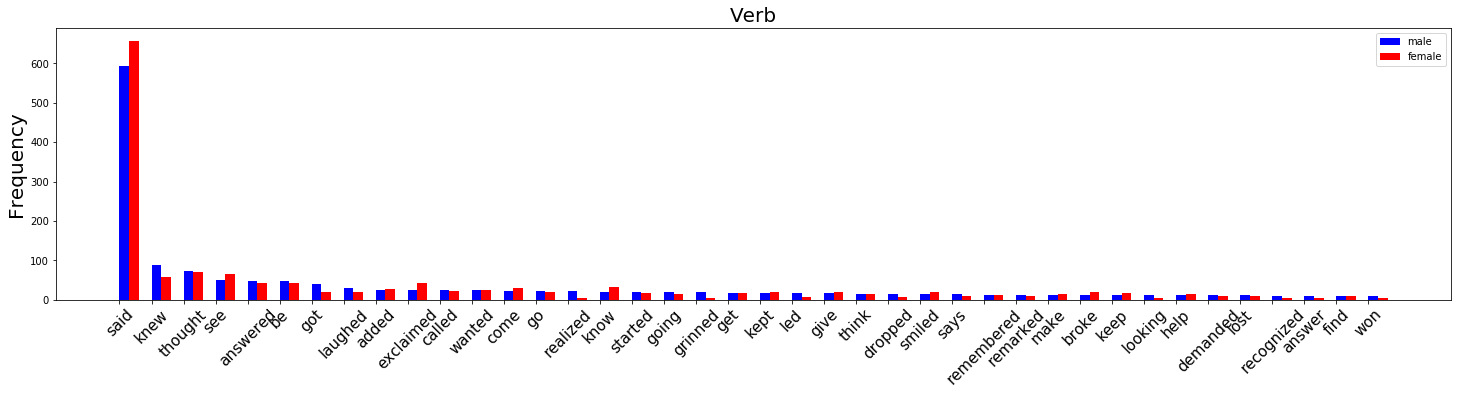

In [57]:
fig = plt.figure(figsize=(25,5))
# ax=fig.add_subplot(4,1,1)
index=np.arange(len(all_verb_e1))
m=all_verb_e1['male_verb'].values
f=all_verb_e1['female_verb'].values
bar_width=0.3
plt.bar(index,m,bar_width,color='b',label='male')
plt.bar(index+bar_width,f,bar_width,color='r',label='female')
plt.ylabel('Frequency',fontsize=20)
plt.xticks(rotation=45,fontsize=15)
plt.xticks([i-0.15 for i in index],[i for i in all_verb_e1['verb'].values])
plt.title('Verb',fontsize=20)
plt.legend()
plt.show()